In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

input_path = "../data/input/"
output_path = "../data/output/"

plt.rcParams["figure.figsize"] = (16,8)
algorithm="ogd"

## Input time series

In [2]:
# input_file = 'seq_d1'
input_file = 'series'
f= open(input_path+input_file+'.csv', 'r')
if input_file == 'seq_d1':
    values = f.readline().strip().split(",") 
else:
    values = f.readlines()
    values = [v.replace("\n","") for v in values]
    values = list(map(int, values))
f.close()
print(f"{len(values)} values available")

118 values available


In [3]:
values_threshold = 1000
df_seq = pd.DataFrame(values[:values_threshold],columns=["Data"])
print(f"Selecting the first {values_threshold} values")

Selecting the first 1000 values


In [4]:
df_seq.head(10)

,Data
0,41
1,39
2,50
3,40
4,43
5,38
6,44
7,35
8,39
9,35


## Predictions

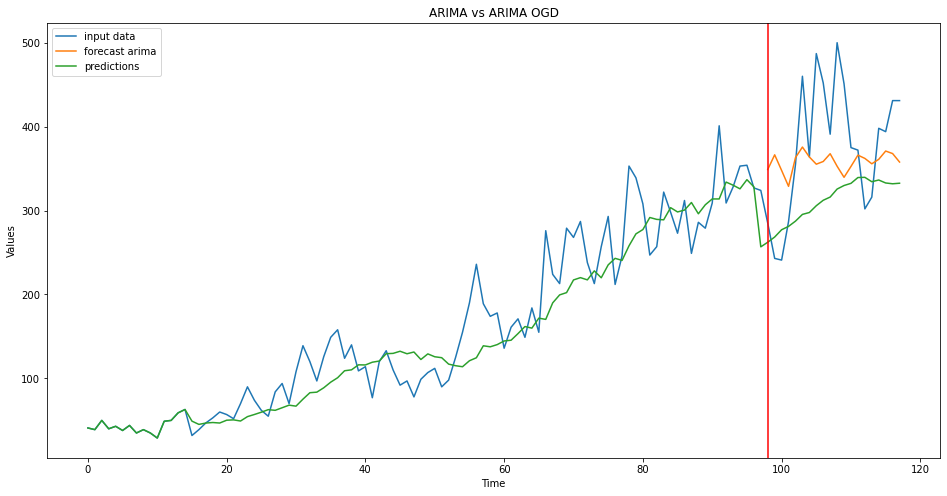

In [5]:
df_pred = pd.read_csv(output_path+algorithm+"_predictions.csv")
df_arima_pred = pd.read_csv(output_path+"forecast.csv")
df_test = pd.read_csv(output_path+algorithm+"_test.csv")
df_gt = pd.read_csv(output_path+algorithm+"_input.csv")

input_data = list(df_gt["input"])

nans = []
for i in range(len(input_data)-20):
    nans.append(math.nan)

test_data = list(df_test["test"])
predicted_data = list(df_pred["predictions"])
arima_forecast = nans+list(df_arima_pred["forecast"])


plt.plot(input_data)
plt.plot(arima_forecast)
plt.plot(predicted_data)
plt.axvline(len(input_data)-20, color="red")

plt.legend(['input data','forecast arima','predictions']);
plt.ylabel('Values')
plt.xlabel("Time")
plt.title("ARIMA vs ARIMA OGD")
plt.show()

## Arima

In [6]:
def plotRMSE(algorithm):
    df = pd.read_csv(output_path+algorithm+"_RMSE.csv")
    plt.plot(df["RMSE"])
    plt.ylabel('RMSE')
    plt.xlabel("Iterations")
    plt.title("RMSE")
    plt.show()

In [7]:
def plotW(algorithm):
    df = pd.read_csv(output_path+algorithm+"_w.csv")
    w_names = []
    for i in range(len(df["w"])):
        w_names.append(str(i))
    plt.bar(list(w_names), df["w"])
    plt.xlabel("Weights")
    plt.ylabel("Values")
    plt.title("Learned W")
    plt.show()

In [8]:
def plotAutocor():
    df = pd.read_csv(output_path+"autocor.csv")
    names = []
    for i in range(len(df["autocor"])):
        names.append(str(i))
    plt.bar(list(names), df["autocor"])
    plt.xlabel("Lags")
    plt.ylabel("Autocorrelation")
    plt.hlines(0.3,xmin=-1,xmax=50, color="red")
    plt.hlines(-0.3,xmin=-1,xmax=50, color="red")
    plt.title("ACF")
    plt.show()

###  Online Gradient Descent

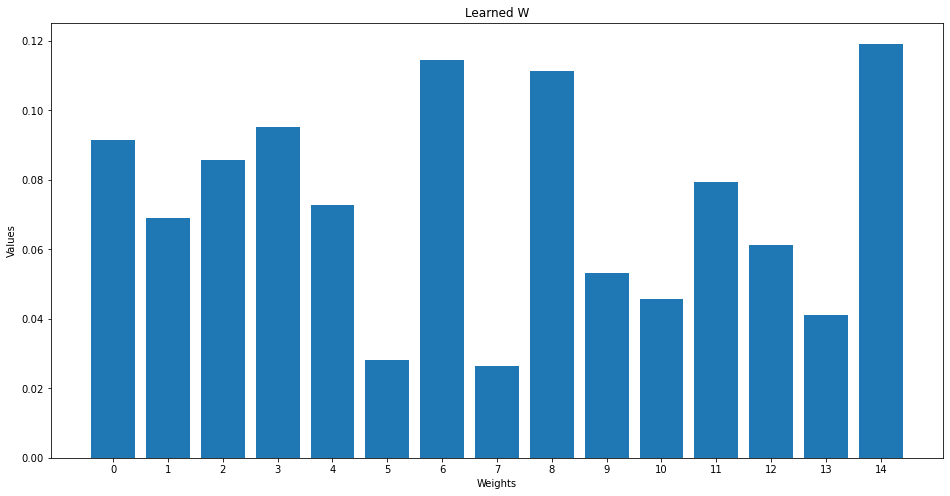

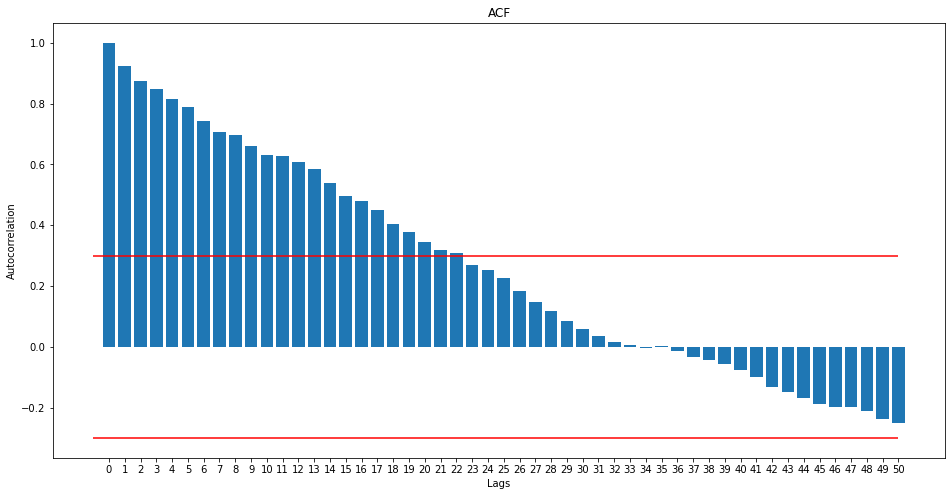

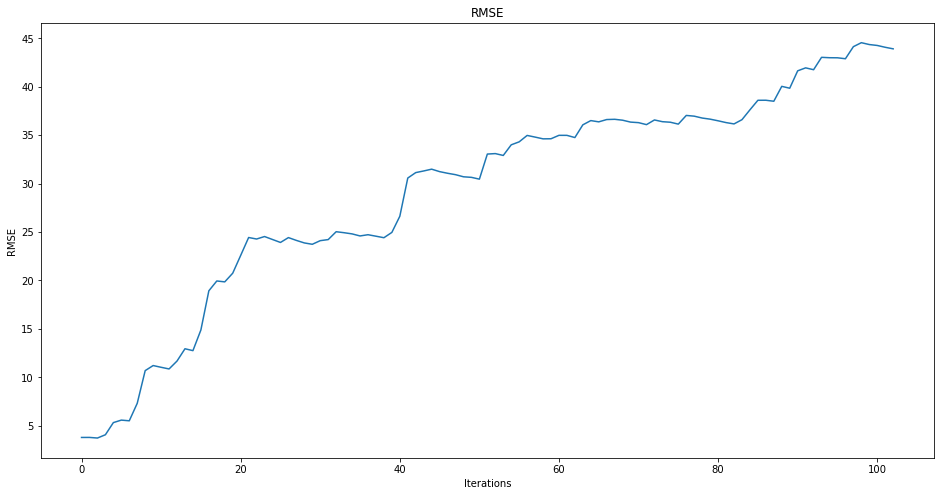

In [9]:
plotW("ogd")
plotAutocor()
plotRMSE("ogd")